# Práctica 1: Primeros pasos con OpenCV

Paquetes necesarios

In [1]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

## TAREA 1: Crea una imagen, p.e. de 800x800 píxeles, con la textura del tablero de ajedrez

## TAREA 2: Crear una imagen estilo Mondrian

## TAREA 3: Utilización de las funciones de dibujo de OpenCV

## TAREA 4: Modifica de forma libre los valores de un plano de la imagen

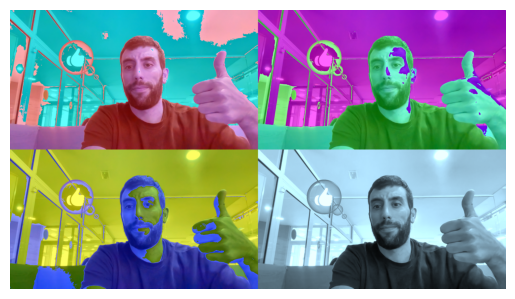

In [7]:
vid = cv2.VideoCapture(0)

while True:
    # frame to frame
    ret, frame = vid.read()

    if not ret:
        # If we've reached the end of the video, reset to the beginning
        vid.set(cv2.CAP_PROP_POS_FRAMES, 0)
        continue

    # get the channels. OpenCV reads the image in BGR format
    b = frame[:,:,0] # blue channel
    g = frame[:,:,1] # green channel
    r = frame[:,:,2] # red channel
    
    b_increased = b + 100
    g_increased = g + 100
    r_increased = r + 100
    
    # altered frame with increased red channel
    altered_frame_b = frame.copy()
    altered_frame_g = frame.copy()
    altered_frame_r = frame.copy()

    altered_frame_b[:,:,0] = b_increased
    altered_frame_g[:,:,1] = g_increased
    altered_frame_r[:,:,2] = r_increased

    sepia_filter = np.array([[0.272, 0.534, 0.131],
                             [0.349, 0.686, 0.168],
                             [0.393, 0.769, 0.189]])

    # apply the sepia filter to the image
    sepia_frame = cv2.transform(frame, sepia_filter)

    # apply the sepia filter to the image
    sepia_frame = cv2.transform(frame, sepia_filter)

    # concatenate the altered frames and the sepia frame in 4x4 
    # Create a 4x4 collage
    top_row = np.hstack((altered_frame_b, altered_frame_g))
    bottom_row = np.hstack((altered_frame_r, sepia_frame))
    collage = np.vstack((top_row, bottom_row))

    # show the result image
    cv2.imshow('Cam', collage)

    # stop the video when the ESC key is pressed
    if cv2.waitKey(20) == 27:
        plt.imshow(collage)
        plt.axis('off')
        plt.show()
        break

# release the video capture object
vid.release()
# destroy the windows
cv2.destroyAllWindows()

## TAREA 5: Pintar círculos en las posiciones del píxel más claro y oscuro de la imagen 

## TAREA 6: Elaboración de una propuesta pop art utilizando la entrada de la cámara web o vídeo